# Project 3: Regression

## Introducing the problem:
For this project I wanted to take a look at the diabetes dataset from the [scikit-learn module](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). I want to use linear regression to 

## What is Linear Regression?
Linear regression is a statistical analysis model that is used model the relationship between a dependent variable and one or more independent variables. In our case the line it will be creating is linear equation of the form:
$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon $$
This equation is specifically the multiple linear regression eqation where:
- $y$ is the dependent variable (the variable we are trying to predict),
- $\beta_0$ is the y-intercept (the constant term),
- $\beta_1$, $\beta_2$, $\dots$, $\beta_n$ are the coefficients of the independent variables  $x_1$, $x_2$, $\dots$, $x_n$,
- $\epsilon$ is the error term.

To find the coefficients of for the equation we want to minimize the sum of squared difference between predicted value $\hat y$ (y hat) and the actual y-value. This process, known as least squares matematically looks like $\sum(y_i - \hat y_i)^2$ where $y_i$ is the actal value and $\hat y_i$ is the predicted value.

## Introducing the Dataset:
The dependent variable called "Targets" "is a quantitative measure of disease progression one year after baseline" according to the dataset website. The way we will predict it is with the following independent variables:
- $x_1$ is age: person's age in years
- $x_2$ is sex: where a negative value is female and a positive value is male
- $x_3$ is bmi: body mass index
- $x_4$ is bp: average blood pressure
- $x_5$ is s1: total serum cholesterol
- $x_6$ is s2: low-density lipoproteins
- $x_7$ is s3: high-density lipoproteins
- $x_8$ is s4: total cholesterol / HDL
- $x_9$ is s5: ltg, possibly log of serum triglycerides level
- $x_{10}$ is s6: blood sugar level5
 is s6

In [1]:
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler, normalize
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the Dataset

In [3]:
# fetch dataset 
X,y = load_diabetes(return_X_y=True, as_frame=True)
df = pd.concat([X,y], axis=1)
df.shape, df.head()

((442, 11),
         age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  target  
 0 -0.002592  0.019907 -0.017646   151.0  
 1 -0.039493 -0.068332 -0.092204    75.0  
 2 -0.002592  0.002861 -0.025930   141.0  
 3  0.034309  0.022688 -0.009362   206.0  
 4 -0.002592 -0.031988 -0.046641   135.0  )

## Visualization

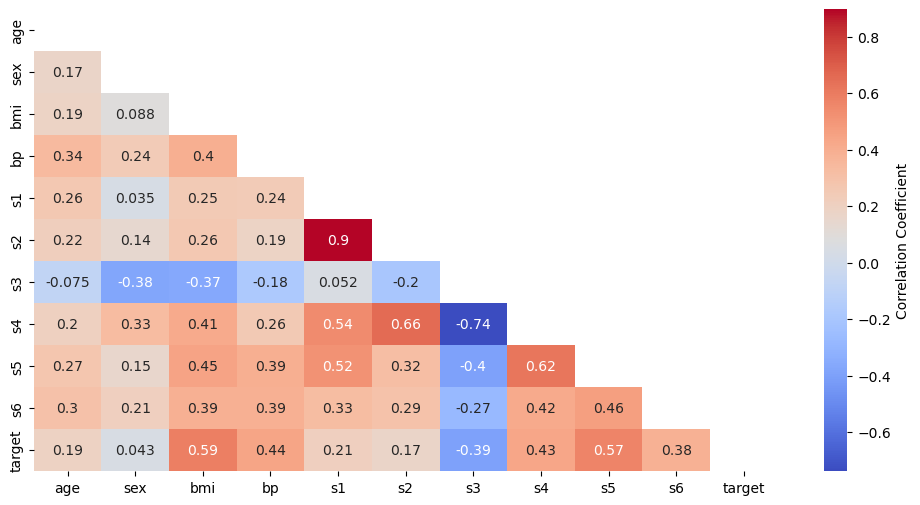

In [4]:
plt.figure(figsize=(12, 6))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.show()

# Experiment 1:

## Preprocessing:
The dataset is already scaled and mean centered according to the scikit-learn website so there is no need to further scale it. It also has no null values. I wanted to check for multicolinearity which there is some, but I am not going to worry about it at this point because those features are important to the regression. The features with the highest VIF are S1, S2, S3, S4, and S5 which all have a VIF greater than 

In [5]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature        VIF
0     age   1.217307
1     sex   1.278071
2     bmi   1.509437
3      bp   1.459428
4      s1  59.202510
5      s2  39.193370
6      s3  15.402156
7      s4   8.890986
8      s5  10.075967
9      s6   1.484623


## Model Creation and Metrics:
For our model we will be using the Statsmodels API because it is very similar to R which I am familiar with. It provides us with a particularly useful function from R called the summary functions which allow us to gather important metrics and model coefficients a lot easier. The main things we want from this are the Adjusted $R^2$ value, the AIC, BIC, and model coefficients.

In [7]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        12:36:57   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

## Evaluation:
For the first experiment which had no preprocessing, scaling, normalization, standardizing, or dimentionality reduction gives us the following linear model:
$$ y = 152.1335 -10.0099x_1 - 239.8156x_2 + 519.8459x_3 + 324.3846x_4 - 792.1756x_5 + 476.7390x_6 + 101.0433x_7 + 177.0632x_8 + 751.2737x_9 + 67.6267x_{10} $$
where:
- $x_1$ is age
- $x_2$ is sex
- $x_3$ is bmi
- $x_4$ is bp
- $x_5$ is s1
- $x_6$ is s2
- $x_7$ is s3
- $x_8$ is s4
- $x_9$ is s5
- $x_{10}$ is s6
  
The model has an Adjusted $R^2$ value of 0.507, an AIC of $4794.00$, and a BIC of $4839.00$. These values can be used later to compare the models between experiments to find the best one.

# Experiment 2:

## Preprosessing:
The first thing I want to check going into Experiment 2 is what combination of predictors will give me the best model. This is determined by the models Adjusted $R^2$ value which is a modified version of the regular $R^2$ which takes into account the number of predictors when approximating how much of the variance in the dependent variable is explained by the independent variables. Our goal is the find the model with the highest Adjusted $R^2$.


Best model:
Variables: ('sex', 'bmi', 'bp', 's1', 's2', 's4', 's5', 's6'), Adjusted R-squared: 0.5086


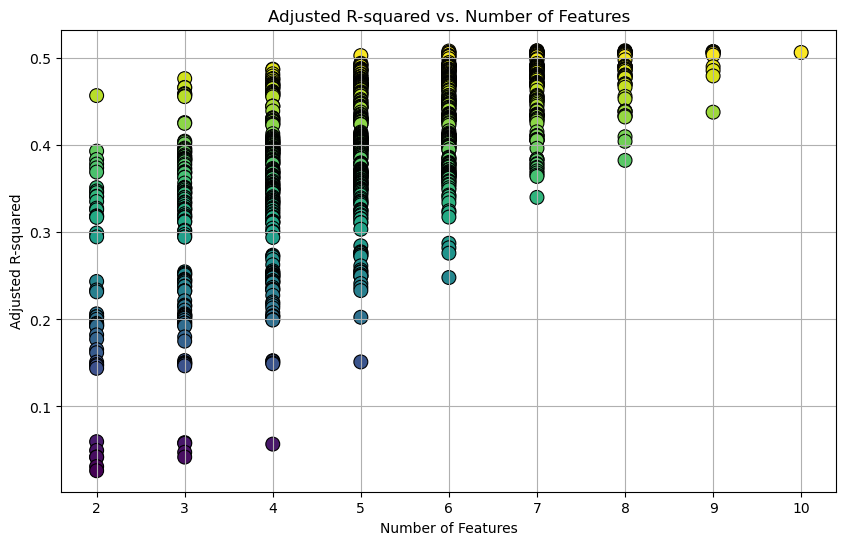

In [8]:
import itertools
results = []
indep_vars = list(df.columns)
indep_vars.remove('target')
for r in range(2, 11):
    for combo in itertools.combinations(indep_vars, r):
        X = df[list(combo)]
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        y = df['target']
        
        # Fit the model
        model = sm.OLS(y, X).fit()
        
        # Store the results
        results.append({
            'variables': combo,
            'adjusted_r_squared': model.rsquared_adj,
            'num_features': len(combo)
        })
results = sorted(results, key=lambda x: x['adjusted_r_squared'], reverse=True)

best_model = results[0]
print("\nBest model:")
print(f"Variables: {best_model['variables']}, Adjusted R-squared: {best_model['adjusted_r_squared']:.4f}")

num_features = [result['num_features'] for result in results]
adjusted_r_squared_values = [result['adjusted_r_squared'] for result in results]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=num_features, y=adjusted_r_squared_values, 
                    hue=adjusted_r_squared_values, palette="viridis", 
                    s=100, edgecolor="k", legend=False)
plt.xlabel("Number of Features")
plt.ylabel("Adjusted R-squared")
plt.title("Adjusted R-squared vs. Number of Features")
plt.grid(True)
plt.show()

Our results from this shows that removing the 'age' feature has the best adjusted $R^2$. That means for optimal results we can remove that variable.

## Model:
For this model we will get the full parameter list for the most optimal linear regression model 

In [9]:
X_optimized = X.drop(columns=['age'])
model = sm.OLS(y,X_optimized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     51.53
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           5.25e-63
Time:                        12:36:59   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     432   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.573     59.128      0.0

## Evaluation:
The second experiment in which we found the model with the best predictors gives us the following model.
$$ y = 152.1335 - 240.8309x_2 + 519.9106x_3 + 322.3005x_4 - 790.8883x_5 + 474.3715x_6 + 99.7167x_7 + 177.4572x_8 + 749.50097x_9 + 66.1713x_{10} $$
where:
- $x_2$ is sex
- $x_3$ is bmi
- $x_4$ is bp
- $x_5$ is s1
- $x_6$ is s2
- $x_7$ is s3
- $x_8$ is s4
- $x_9$ is s5
- $x_{10}$ is s6
  
The model has an Adjusted $R^2$ value of 0.508, an AIC of $4792.00$, and a BIC of $4833.00$. When comparing this to the first model it is not insanely better than the first one, but still better none the less. The way we can tell its better is because the Adjusted $R^2$ is higher and the AIC and BIC values are smaller, not by much, but enough to make a semi-noticable effect.

# Experiment 3:
For this experiment I am going to perform an L2 or Ridge Regrularization on the optimized predictors from experiment two.

## Model:

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_model = Ridge(alpha=1.0)  # alpha controls regularization strength
ridge_model.fit(X_optimized, y)
y_pred = ridge_model.predict(X_optimized)

# Performance metrics
print("R^2:", r2_score(y, y_pred))
print("Adjusted R^2:", 1 - (1 - r2_score(y, y_pred)) * (len(y) - 1) / (len(y) - X_optimized.shape[1] - 1))
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)

R^2: 0.4514095745662201
Adjusted R^2: 0.4386812584308656
Intercept: 152.133484162896
Coefficients: [   0.          -81.51459972  307.07911754  205.0496653     7.67926684
  -28.34103855 -151.47486937  117.70362907  264.72239169  114.46821034]


## Evaluation:
After performing the regularization we get the following linear equation:
$$ y = 152.133484162896 - 81.51459972x_2 + 307.07911754x_3 + 205.0496653x_4 + 7.67926684x_5 - 28.34103855x_6 - 151.47486937x_7 + 117.70362907x_8 + 264.72239169x_9 + 114.46821034x_{10} $$
where:
- $x_2$ is sex
- $x_3$ is bmi
- $x_4$ is bp
- $x_5$ is s1
- $x_6$ is s2
- $x_7$ is s3
- $x_8$ is s4
- $x_9$ is s5
- $x_{10}$ is s6

We also get an Adjusted $R^2$ of 0.439 which is significantly worse than before. Another thing about this model is the massive change in almost all of the coefficients. This massive change in the model makes me think there might have been a miscalculation when performing the regularization.

# Impact and Conclusion:
The impact this kind of model would have on the medical industry would be massive because it would allow doctors to predict diabetes progression and see if its getting worse over time. However, the models I've created are not suited for professional use due to the low metrics gathered from the models. In the future I would like to try some different models for this dataset to see if I can improve the Adjusted $R^2$ values.